In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
snow_slope = np.arange(1,101)
snow_ramp = np.vstack([snow_slope]*100)

sqrt_slope = [round(10*x,1) for x in np.sqrt(np.arange(1,101))]
sqrt_snow_ramp = np.vstack([sqrt_slope]*100)

sq_slope = [round(x/100,1) for x in np.square(np.arange(1,101))]
sq_snow_ramp = np.vstack([sq_slope]*100)

weibull = 10*np.random.weibull(1,(100,100))

In [124]:
def show_test_surface(surface):
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(131)
    ax1.plot(surface[0])
    ax2 = fig.add_subplot(132)
    ax2.imshow(surface,cmap='coolwarm')
    ax3 = fig.add_subplot(133)
    ax3.hist(surface, bins=10, normed=True, facecolor='g', alpha=0.75, histtype = 'bar')


In [79]:
def test_thresholds(surface):

    thresh_vals = [1,10,20,30,40,50,60,70,80,90,99]

    drift_areas = []
    not_drift_areas = []
    drift_means = []
    not_drift_means = []
    drift_masses = []
    not_drift_masses = []

    for threshold in thresh_vals:

        threshold = (threshold / 100) * surface.max()
        drift_mask = surface > threshold
        not_drift_mask = surface <= threshold

        drift_area = drift_mask.sum()
        not_drift_area = not_drift_mask.sum()

        drift_mean = (np.sum(drift_mask * surface)) / drift_area

        not_drift_mean = (np.sum(not_drift_mask * surface)) / not_drift_area

        drift_mass = drift_mean * drift_area

        not_drift_mass = not_drift_mean * not_drift_area

        drift_areas.append(drift_area)
        not_drift_areas.append(not_drift_area)
        drift_means.append(drift_mean)
        not_drift_means.append(not_drift_mean)
        drift_masses.append(drift_mass)
        not_drift_masses.append(not_drift_mass)
    
    plt.figure(figsize=(8,5))
    plt.plot(thresh_vals, drift_areas, '-ro', label = 'Drift Area')
    plt.plot(thresh_vals, not_drift_areas, '-bo', label = 'Not Drift Area')
    plt.xlabel('Threshold (% of max)')
    plt.legend()
    
    plt.figure(figsize=(8,5))
    plt.axhline(y=surface.mean(), color='g', alpha=0.5, label = 'Total Mean')
    plt.plot(thresh_vals, drift_means, '-ro', label = 'Drift Mean')
    plt.plot(thresh_vals, not_drift_means, '-bo', label = 'Not Drift Mean')
    plt.xlabel('Threshold (% of max)')
    plt.legend()
    
    plt.figure(figsize=(8,5))
    plt.plot(thresh_vals, drift_masses, '-ro', label = 'Drift Mass')
    plt.plot(thresh_vals, not_drift_masses, '-bo', label = 'Not Drift Mass')
    plt.xlabel('Threshold (% of max)')
    plt.legend()


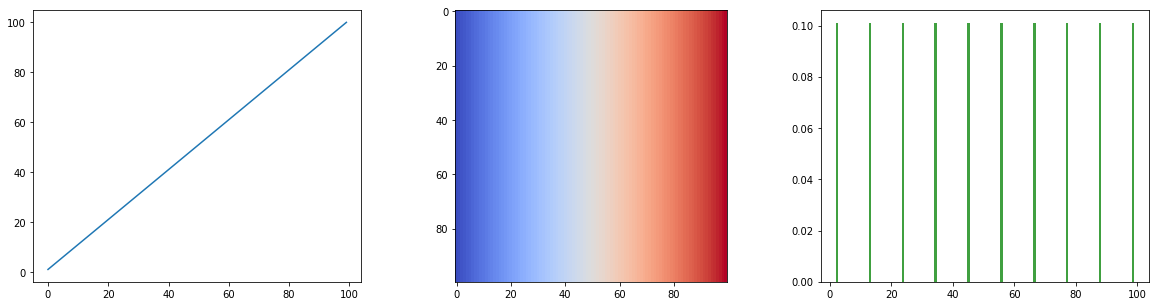

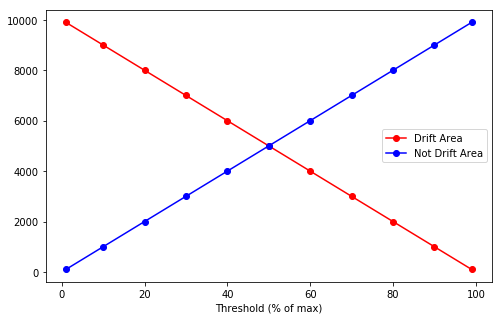

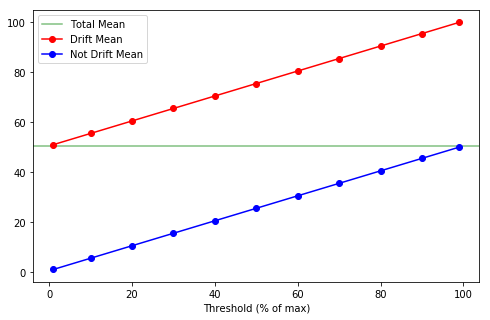

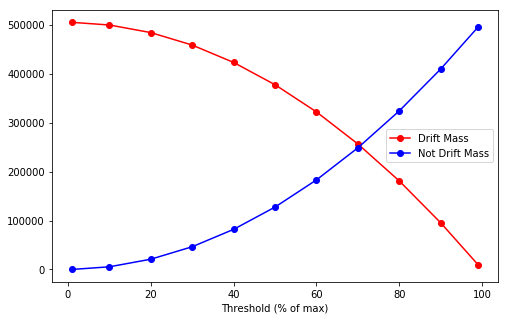

In [125]:
show_test_surface(snow_ramp)
test_thresholds(snow_ramp)

/home/cparr/miniconda3/envs/raster_IO/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


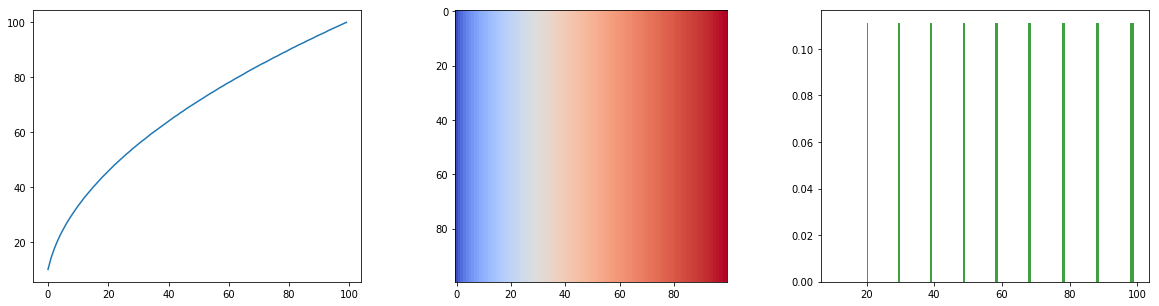

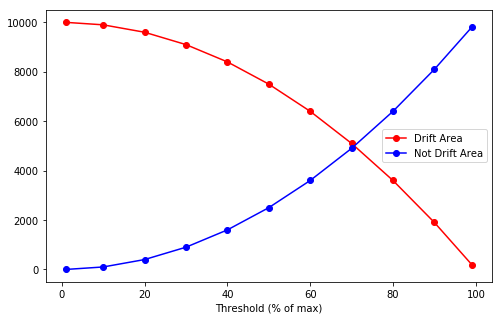

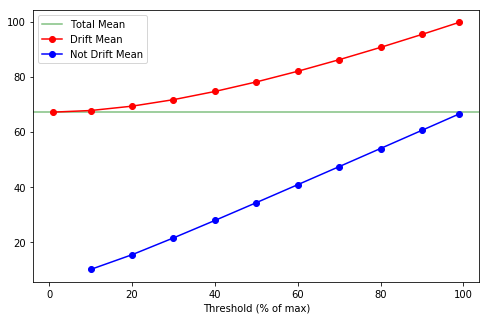

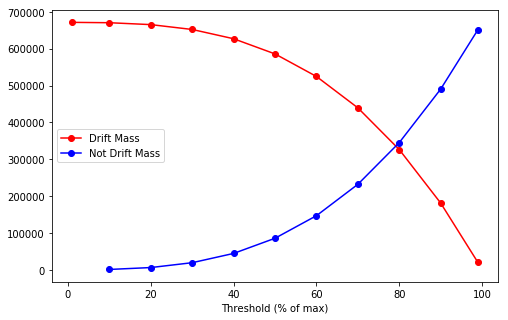

In [126]:
show_test_surface(sqrt_snow_ramp)
test_thresholds(sqrt_snow_ramp)

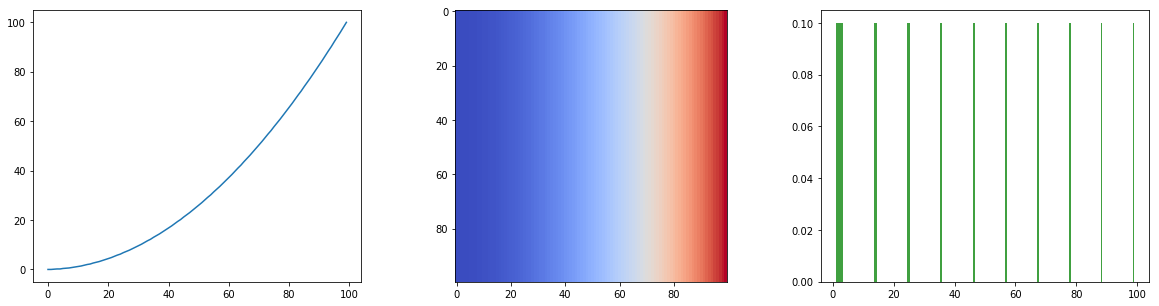

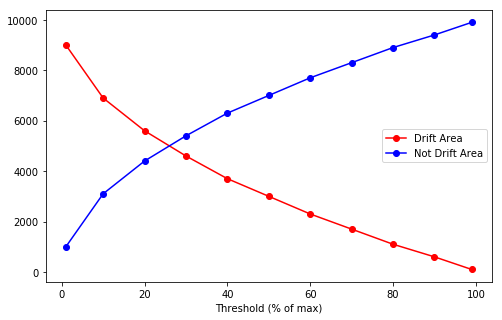

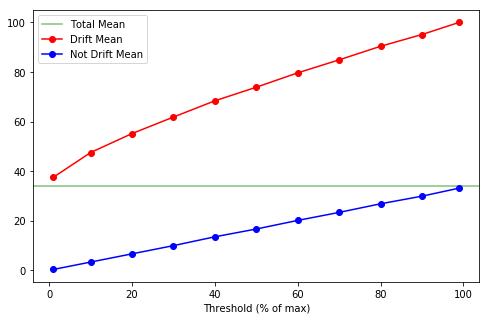

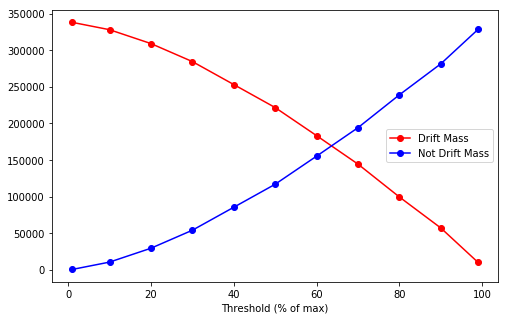

In [128]:
show_test_surface(sq_snow_ramp)
test_thresholds(sq_snow_ramp)

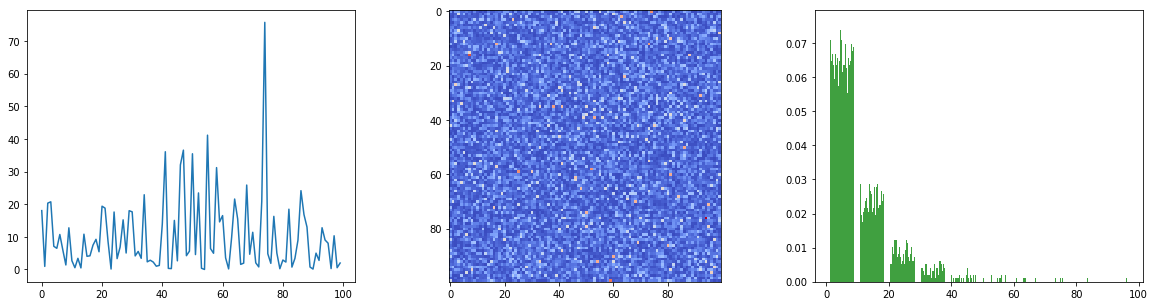

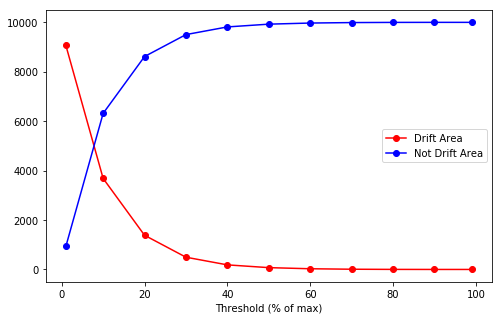

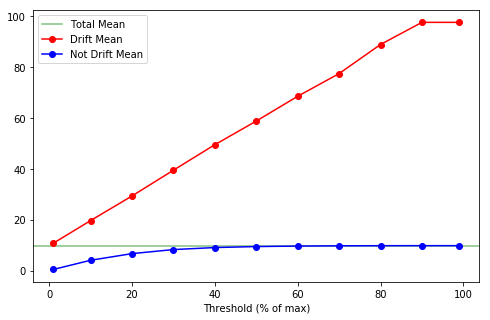

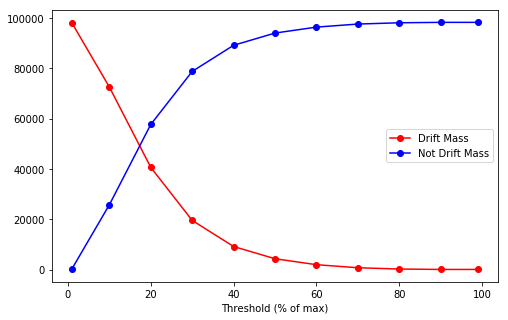

In [129]:
show_test_surface(weibull)
test_thresholds(weibull)

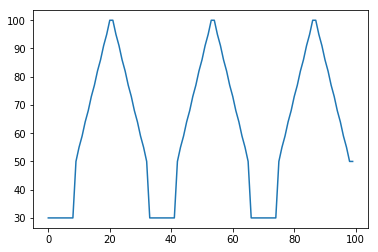

In [192]:
windward_half = [round(x) for x in np.linspace(50,100,12)]
leeward_half = windward_half[::-1]
drift = windward_half+leeward_half
interfluve = [30]*9
x = interfluve + drift + interfluve + drift + interfluve + drift + [50]
plt.plot(x)

In [193]:
trenches = np.vstack([x]*100)
trenches.shape

(100, 100)

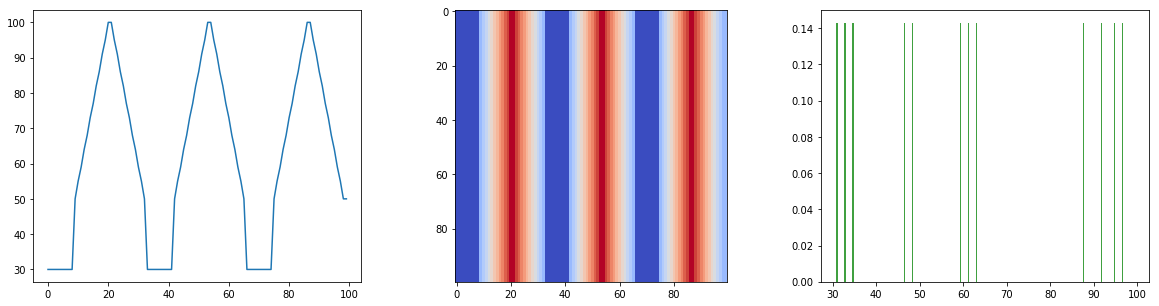

In [194]:
show_test_surface(trenches)

/home/cparr/miniconda3/envs/raster_IO/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


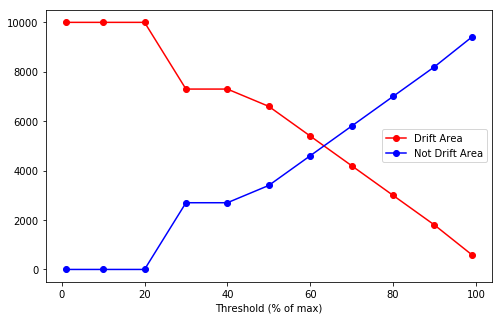

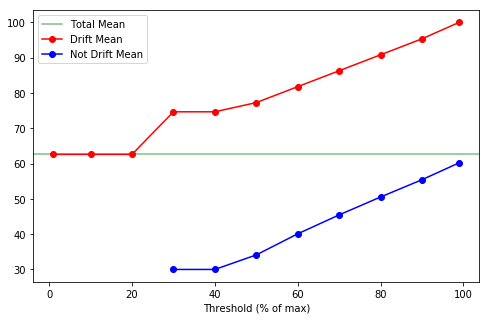

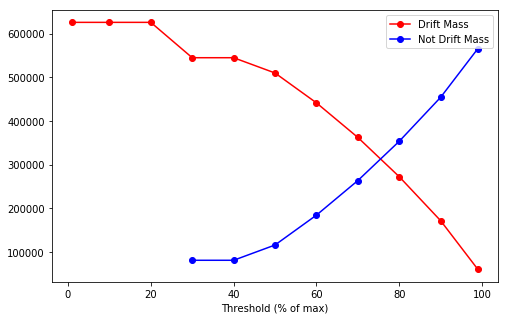

In [195]:
test_thresholds(trenches)

In [186]:
trenches[17][20]

101.0